In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

Load dataset csv file into a data frame.

In [2]:
df = pd.read_csv("data.csv")

## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [3]:
num_samples = len(df)
num_features = len(df.columns)
feature_types = df.dtypes

null_counts = df.isnull().sum()

categorical_features = df.select_dtypes(include='object').columns
value_counts = {}
for feature in categorical_features:
    value_counts[feature] = df[feature].value_counts()

print("Number of Samples: {}".format(num_samples))
print("Number of Features: {}".format(num_features))
print()
print("Feature Types:\n{}".format(feature_types))

print()
print("Null Checking:")
print(null_counts)

Number of Samples: 1025
Number of Features: 14

Feature Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Null Checking:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
statistics = pd.DataFrame({
    'Mean': df.mean(),
    'STD': df.std(),
    'Median': df.median(),
    'Minimum': df.min(),
    'Maximum': df.max()
})
print('some statistics analysis on data:')
print(statistics)

some statistics analysis on data:
                Mean        STD  Median  Minimum  Maximum
age        54.434146   9.072290    56.0     29.0     77.0
sex         0.695610   0.460373     1.0      0.0      1.0
cp          0.942439   1.029641     1.0      0.0      3.0
trestbps  131.611707  17.516718   130.0     94.0    200.0
chol      246.000000  51.592510   240.0    126.0    564.0
fbs         0.149268   0.356527     0.0      0.0      1.0
restecg     0.529756   0.527878     1.0      0.0      2.0
thalach   149.114146  23.005724   152.0     71.0    202.0
exang       0.336585   0.472772     0.0      0.0      1.0
oldpeak     1.071512   1.175053     0.8      0.0      6.2
slope       1.385366   0.617755     1.0      0.0      2.0
ca          0.754146   1.030798     0.0      0.0      4.0
thal        2.323902   0.620660     2.0      0.0      3.0
target      0.513171   0.500070     1.0      0.0      1.0


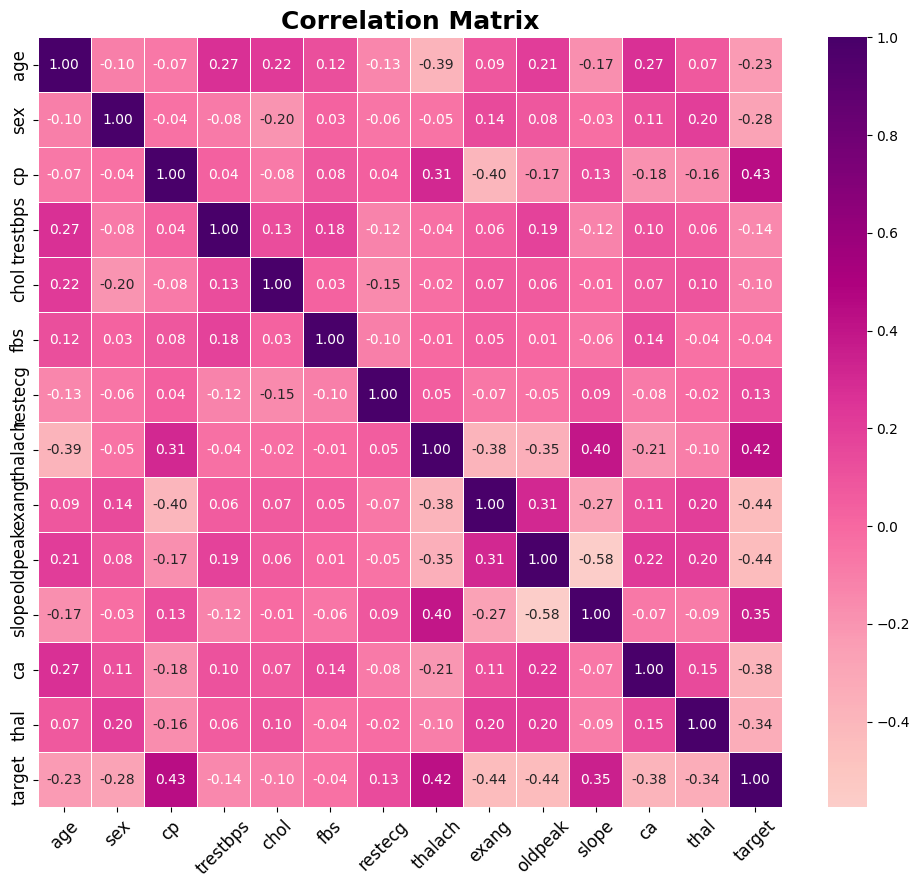

In [5]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
# Create custom colormap with a range of girly colors :)))
cmap = plt.colormaps['RdPu']
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='white')
plt.title('Correlation Matrix', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

<Figure size 1400x1000 with 0 Axes>

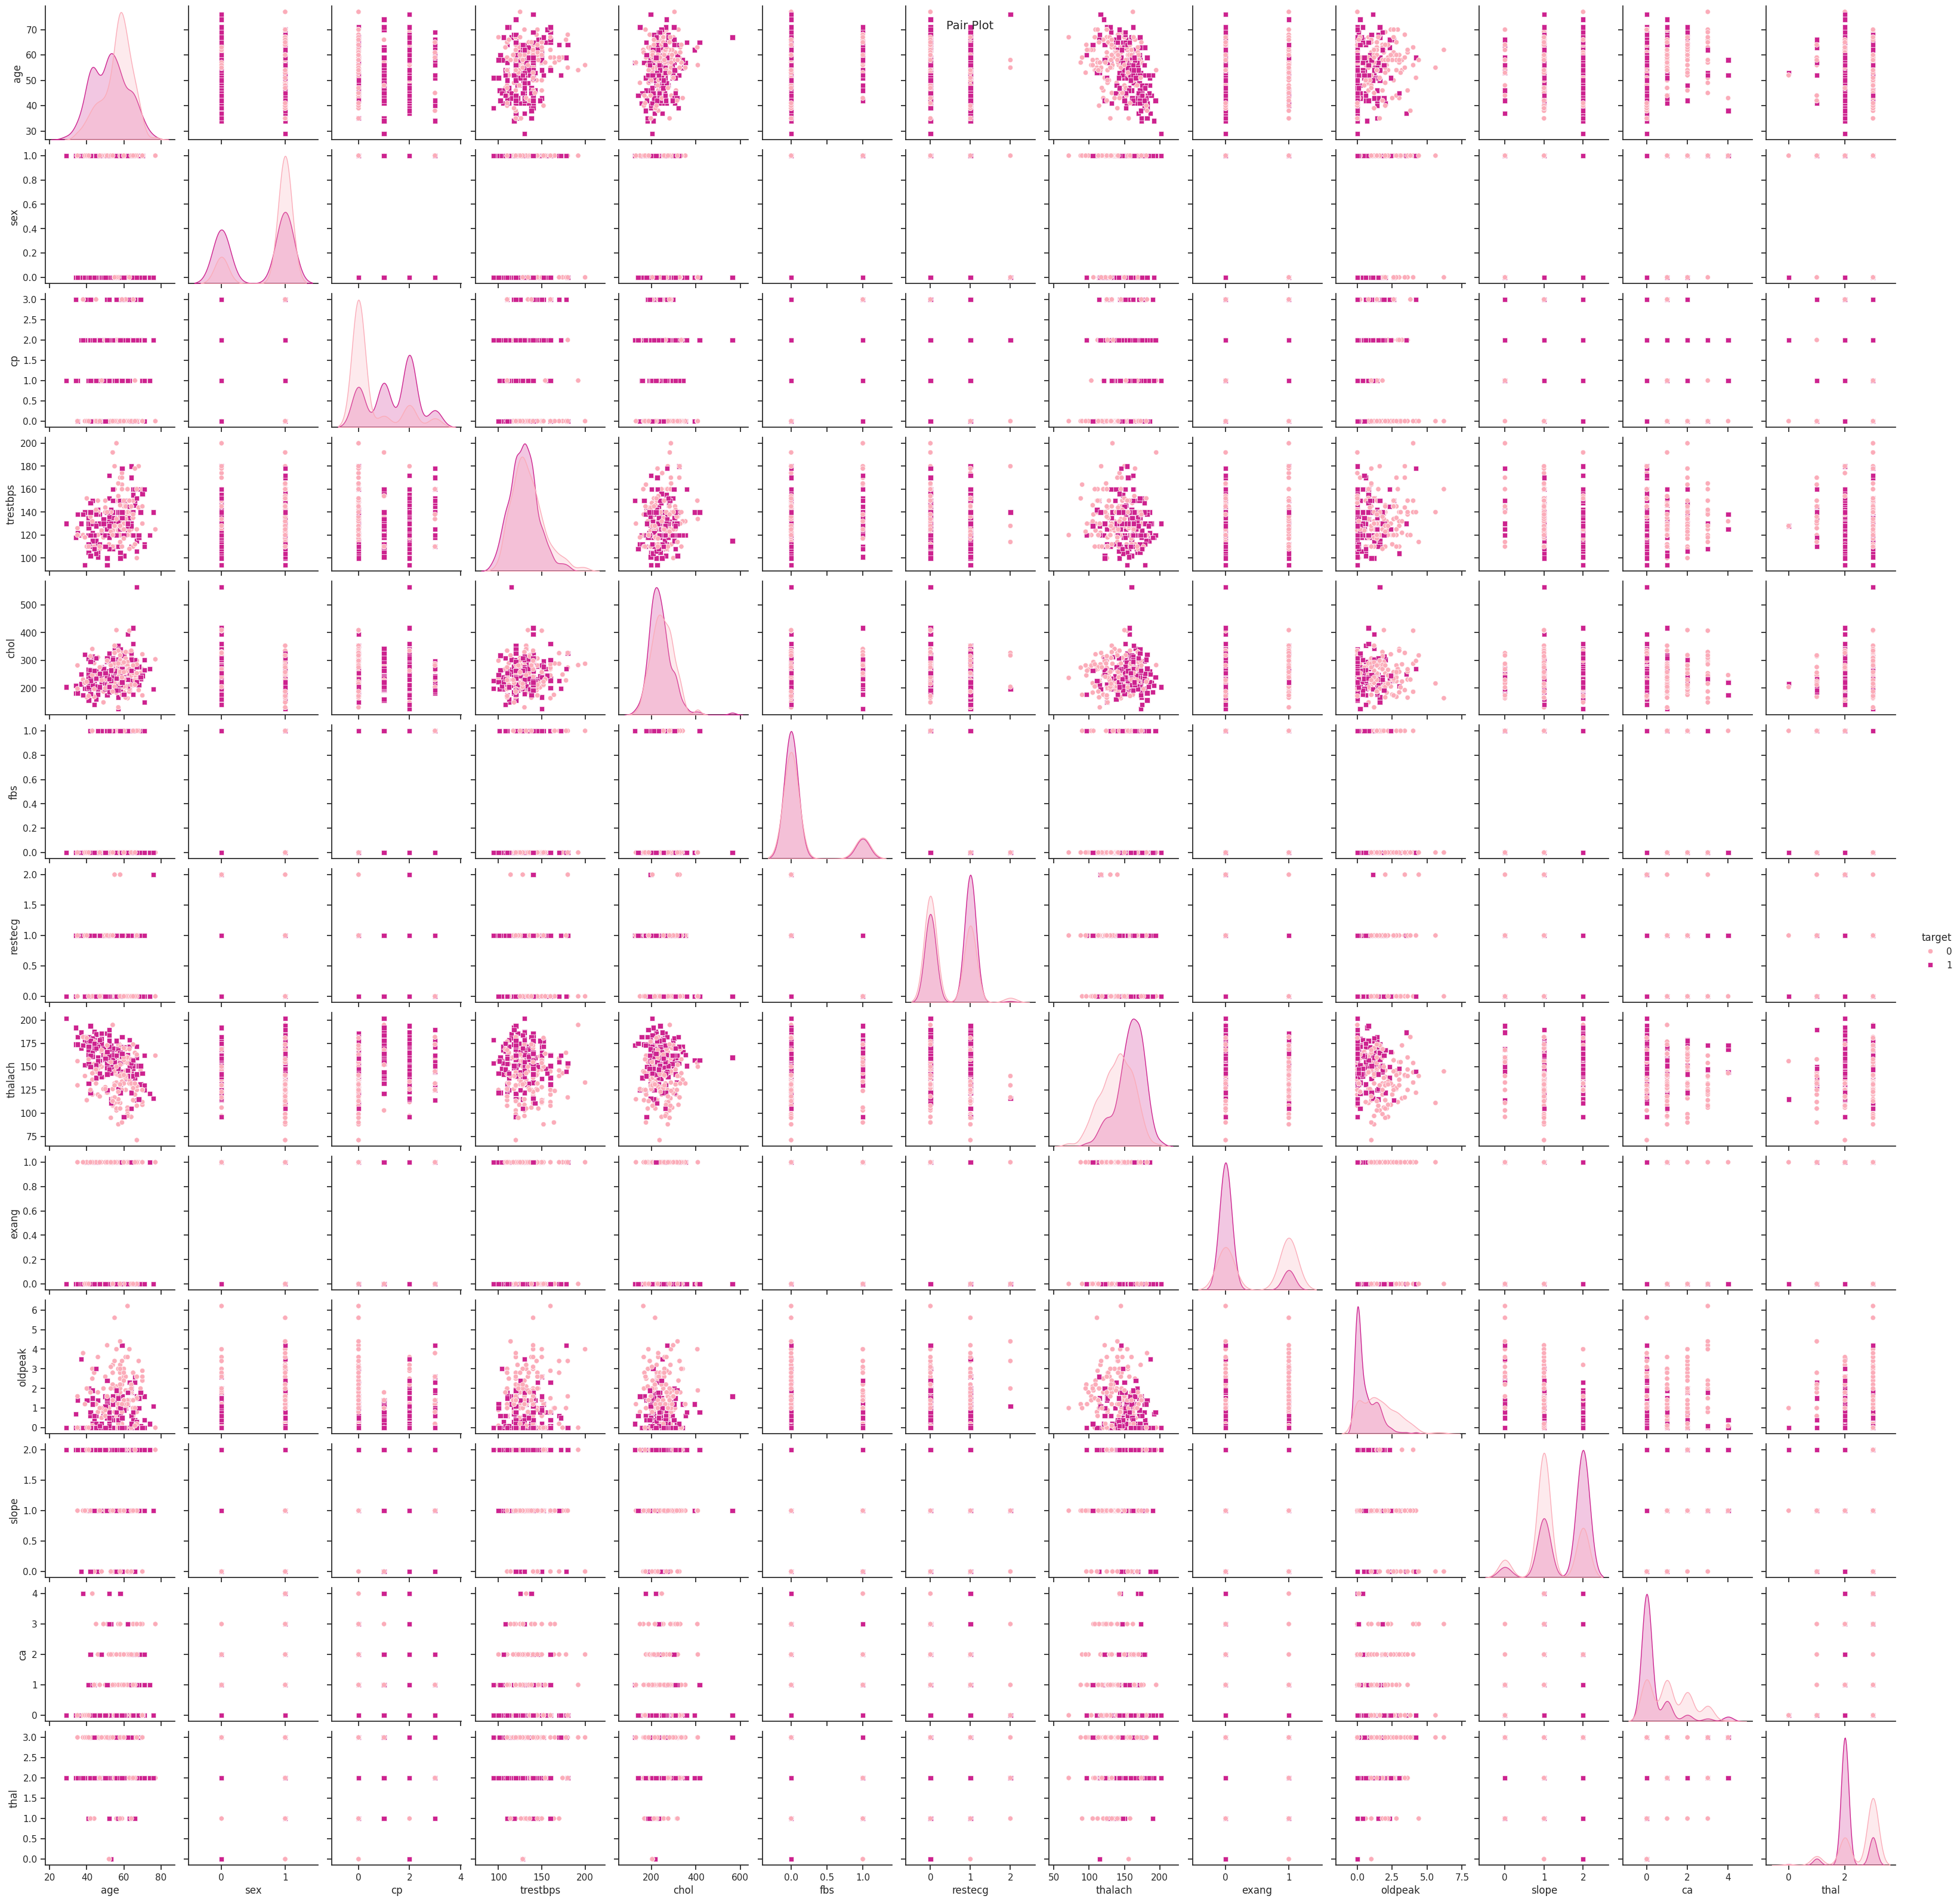

In [6]:
# Pair Plot
sns.set(style="ticks")
plt.figure(figsize=(14, 10))
sns.pairplot(df, hue="target", palette="RdPu", markers=["o", "s"])
plt.suptitle("Pair Plot", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifies continuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [7]:
discrete_features = []
continuous_features = []

for column in df.columns:
    unique_count = df[column].nunique()
    if unique_count <= 20:
        discrete_features.append(column)
    else:
        continuous_features.append(column)

discrete_df = pd.DataFrame({'Variables': discrete_features})
discrete_df['Type'] = 'Discrete'

continuous_df = pd.DataFrame({'Variables': continuous_features})
continuous_df['Type'] = 'Continuous'

result_df = pd.concat([discrete_df, continuous_df], ignore_index=True)
print(result_df)
print(f'discrete features count: {len(discrete_features)}, continuous features count: {len(continuous_features)}')

   Variables        Type
0        sex    Discrete
1         cp    Discrete
2        fbs    Discrete
3    restecg    Discrete
4      exang    Discrete
5      slope    Discrete
6         ca    Discrete
7       thal    Discrete
8     target    Discrete
9        age  Continuous
10  trestbps  Continuous
11      chol  Continuous
12   thalach  Continuous
13   oldpeak  Continuous
discrete features count: 9, continuous features count: 5


### Now let's check how the features affect each other

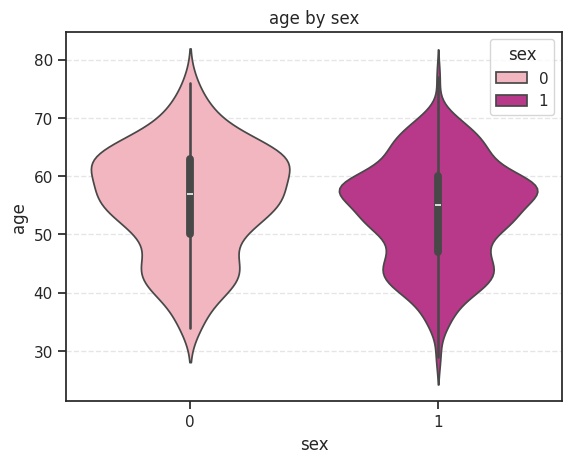

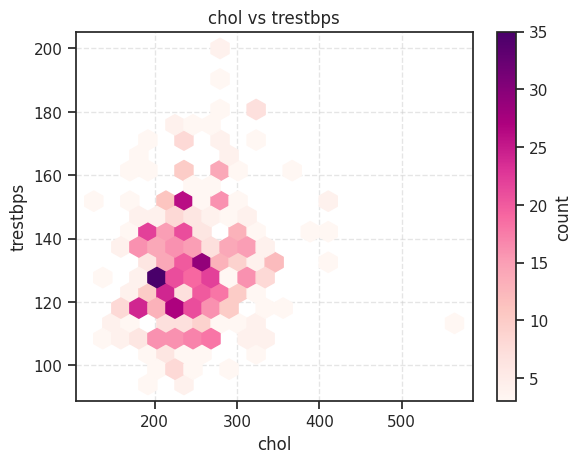

In [8]:
sns.violinplot(x='sex', y='age', data=df, hue='sex', palette='RdPu')
plt.title('age by sex', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

plt.hexbin(df['chol'], df['trestbps'], gridsize=20, cmap='RdPu', mincnt=1)
plt.title('chol vs trestbps', fontsize=12)
plt.xlabel('chol', fontsize=12)
plt.ylabel('trestbps', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)
plt.colorbar(label='count')
plt.show()

# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [9]:
def perceptron_sgd(X, Y, learning_rate=0.02, epochs=5000):
    
    '''
    
    Initialize the weight vector for the perceptron with zeros
    Set the learning rate
    Set the number of epochs
    Iterate n times over the whole dataset.
    Iterate over each sample in the dataset
    Misclassification condition y_i * (x_i . w) <= 0
    Update rule for the weights w = w + y_i * x_i including the learning rate
    
    '''
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        for i, x_i in enumerate(X):
            
            if (Y[i] * np.dot(x_i, w)) <= 0:
                w = w + learning_rate * Y[i] * x_i
    return w

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [10]:
def perceptron_sgd_plot(X, Y, learning_rate=0.2, epochs=5000):
    '''
    TODO: train perceptron and plot the total loss in each epoch. You may not use the above perceptron_sgd(X, Y) function.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    
    w = np.zeros(X.shape[1])
    errors = []

    for epoch in range(epochs):
        error = 0
        for i, x_i in enumerate(X):
            if Y[i] == 0:
                Y[i] = -1
            if (Y[i] * np.dot(x_i, w)) <= 0:
                error += max(0, 1 - (Y[i] * np.dot(x_i, w)))
                w = w + learning_rate * Y[i] * x_i
        errors.append(error)

    plt.plot(errors, color='pink')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Total Loss vs. Epoch')
    plt.show()

    return w

In [11]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = [-1 if val == 0 else val for val in y]

In [12]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.

# add a -1 bias term to the end of each row
n = len(df)
bias_column =np.full((n, 1), -1)

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [13]:
# TODO: Split the data to train and test with a 0.2 ratio
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

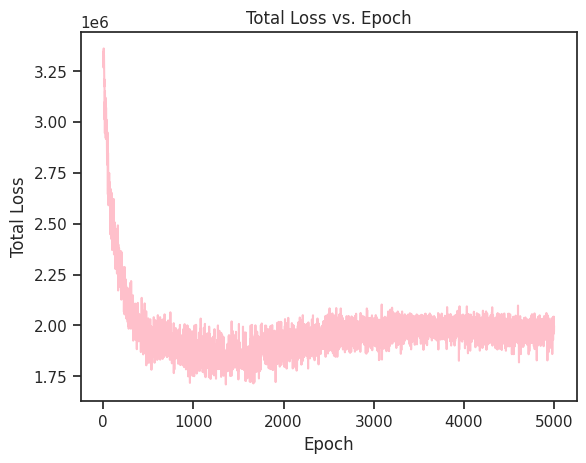

In [14]:
w = perceptron_sgd_plot(X_train, y_train)

### Accuracy


Implement the `accuracy_score` function by considering the predictions and true labels.

In [15]:
def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(np.array(y_true) == np.array(y_pred))
    accuracy = correct_predictions / len(y_true)
    return accuracy

Get the accuracy of your model using the function you implemented.

In [16]:
def compute_predictions(X, w):
    pred = np.sign(np.matmul(X, w))
    return pred

In [17]:
predictions = compute_predictions(X_val, w)
print(accuracy_score(y_val, predictions))

0.8536585365853658


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [18]:
def confusion_matrix(y_true, y_pred):
    labels = np.unique(np.concatenate((y_true, y_pred)))
    num_labels = len(labels)

    label_to_index = {label: index for index, label in enumerate(labels)}

    matrix = np.zeros((num_labels, num_labels), dtype=np.int32)

    for true, pred in zip(y_true, y_pred):
        true_index = label_to_index[true]
        pred_index = label_to_index[pred]
        matrix[true_index][pred_index] += 1

    return matrix.tolist()

Implement the following function to plot the confusion matrix obtained from the previous part.

In [19]:
def plot_confusion_matrix(matrix, labels):
    matrix = np.array(matrix)
    colormap = plt.cm.RdPu
    plt.imshow(matrix, interpolation='nearest', cmap=colormap)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, str(matrix[i][j]), ha='center', va='center', color='black')
    plt.show()

Now plot the confusion matrix for your model:

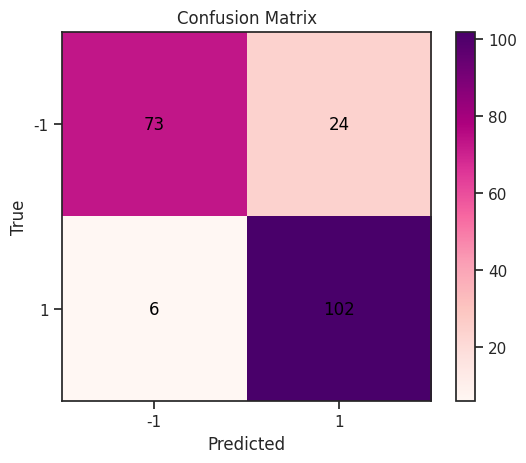

In [20]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, [-1,1])

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [21]:
def recall_score(cm):
    TP = np.diag(cm)
    FN = np.sum(cm, axis=1) - TP
    recall = np.sum(TP) / np.sum(TP + FN)
    return recall

print(recall_score(cm))

0.8536585365853658


In [22]:
def precision_score(cm):
    TP = np.diag(cm)
    FP = np.sum(cm, axis=1) - TP
    precision = np.mean(TP / (TP + FP))
    return precision

print(precision_score(cm))

0.8485108820160366


In [23]:
def f1_score(cm):
    prec = precision_score(cm)
    rec = recall_score(cm)
    f1 = 2 * (prec * rec) / (prec + rec)
    return f1

print(f1_score(cm))

0.8510769256020647


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [24]:
class MixedDataNB:

    def __init__(self):
        self.gnb = GaussianNB()
        self.mnb = MultinomialNB()

    def fit(self, X, y):
        continuous_indices = np.array([isinstance(val, (int, float)) for val in X[0]])
        categorical_indices = ~continuous_indices

        X_continuous = X[:, continuous_indices]
        X_categorical = X[:, categorical_indices]

        if np.any(categorical_indices):
            self.mnb.fit(X_categorical, y)
        if np.any(continuous_indices):
            self.gnb.fit(X_continuous, y)

    def predict(self, X):
        continuous_indices = np.array([isinstance(val, (int, float)) for val in X[0]])
        categorical_indices = ~continuous_indices

        X_continuous = X[:, continuous_indices]
        X_categorical = X[:, categorical_indices]

        continuous_predictions = self.gnb.predict(X_continuous) if np.any(continuous_indices) else np.array([])
        categorical_predictions = self.mnb.predict(X_categorical) if np.any(categorical_indices) else np.array([])

        return categorical_predictions if continuous_predictions.size == 0 else continuous_predictions

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

### Model training

In [26]:
model = MixedDataNB()
model.fit(X_train, y_train)

### Make predictions

In [27]:
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [28]:
print(accuracy_score(y_val, predictions))

0.8536585365853658


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

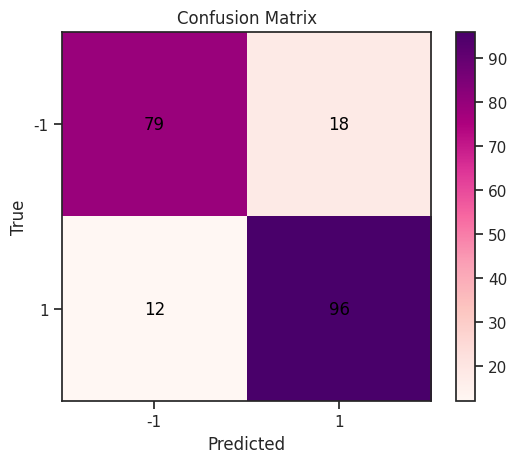

In [29]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, [-1,1])

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [30]:
print(recall_score(cm))

0.8536585365853658


In [31]:
print(precision_score(cm))

0.8516609392898052


In [32]:
print(f1_score(cm))

0.8526585679530133


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


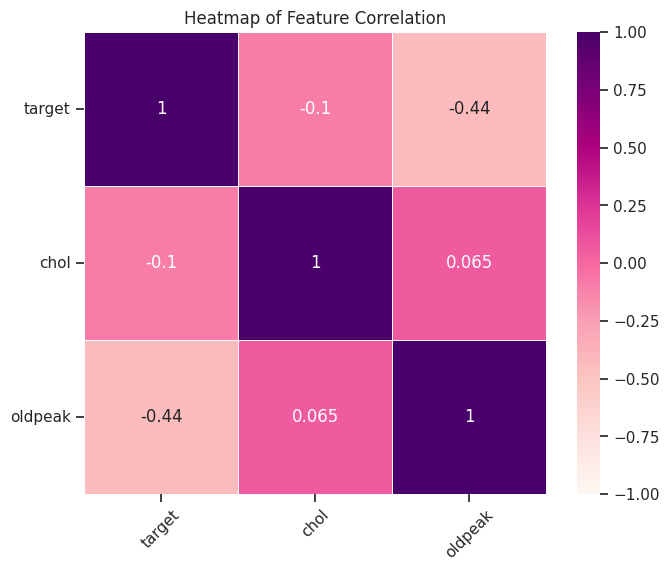

In [33]:

corr_matrix = df[['target', 'chol', 'oldpeak']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap='RdPu',
    center=0,
    linewidths=0.5,
    vmin=-1,
    vmax=1,
    square=True
)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Heatmap of Feature Correlation')
plt.show()

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [34]:
# No Chol 
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = [-1 if val == 0 else val for val in y]        

n = len(df)
bias_column =np.full((n, 1), -1)
X = np.concatenate((X, bias_column), axis=1)        

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)


In [36]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = MixedDataNB()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

In [37]:
cm = confusion_matrix(y_val, predictions)

In [38]:
print("recall: ",recall_score(cm))

recall:  0.8585365853658536


In [39]:
print("percision: ",precision_score(cm))

percision:  0.856815578465063


In [40]:
print("f1_score: ",f1_score(cm))

f1_score:  0.8576752185753188


Remove oldpeak and test model

In [41]:
# No Oldpeak 
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = [-1 if val == 0 else val for val in y]        
        
n = len(df)
bias_column =np.full((n, 1), -1)
X = np.concatenate((X, bias_column), axis=1)        

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

In [43]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = MixedDataNB()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_val_scaled)

In [44]:
cm = confusion_matrix(y_val, predictions)

In [45]:
print("recall: ",recall_score(cm))

recall:  0.8292682926829268


In [46]:
print("percision: ",precision_score(cm))

percision:  0.8285127911416571


In [47]:
print("f1_score: ",f1_score(cm))

f1_score:  0.8288903697597126


Comparison 

***Answer:*** Removing chol may not influence learning, but oldpeak will as it is more correlated with the target.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

***Answer***: Due to the correlation between the data, the perceptron performed better. However, the naive Bayes algorithm assumes independence and does not consider this relationship.

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [48]:
df = pd.read_csv("Imbalanced_Datasets/1.csv")

### Find the distribution


Find the number of samples from each target label.

In [49]:
counts = df['target'].value_counts()
print(f'target label 1: {counts[1]} samples!')
print(f'target label 0: {counts[0]} samples!')

target label 1: 226 samples!
target label 0: 499 samples!


### Split data

In [50]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = [-1 if val == 0 else val for val in y]

n = len(df)
bias_column =np.full((n, 1), -1)
X = np.concatenate((X, bias_column), axis=1)

### Train model and make predictions

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

model = MixedDataNB()
model.fit(X_train,y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

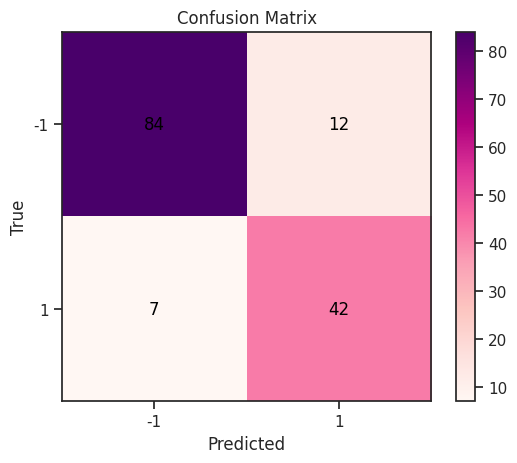

In [52]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, [-1,1])

### Calculate metrics

In [53]:
print("recall: ",recall_score(cm))

recall:  0.8689655172413793


In [54]:
print("percision: ",precision_score(cm))

percision:  0.8660714285714286


In [55]:
print("f1_score: ",f1_score(cm))

f1_score:  0.8675160591972176


## Second dataset

### Load data

In [56]:
df = pd.read_csv("Imbalanced_Datasets/2.csv")

### Find the distribution


Find the number of samples from each target label.

In [57]:
counts = df['target'].value_counts()
print(f'target label 1: {counts[1]} samples!')
print(f'target label 0: {counts[0]} samples!')

target label 1: 126 samples!
target label 0: 499 samples!


### Split data

In [58]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = [-1 if val == 0 else val for val in y]

n = len(df)
bias_column =np.full((n, 1), -1)
X = np.concatenate((X, bias_column), axis=1)

### Train model and make predictions

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

model = MixedDataNB()
model.fit(X_train,y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

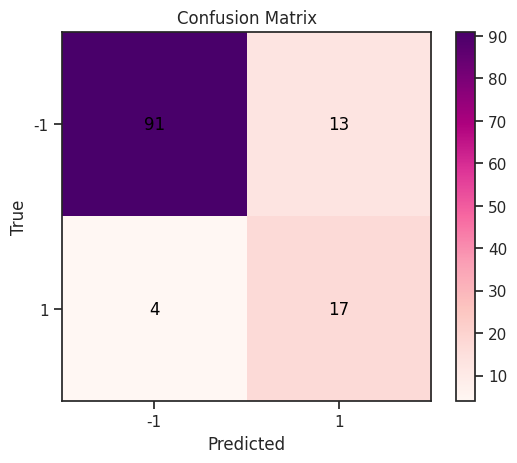

In [60]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, [-1,1])

### Calculate metrics

In [61]:
print("recall: ",recall_score(cm))

recall:  0.864


In [62]:
print("percision: ",precision_score(cm))

percision:  0.8422619047619048


In [63]:
print("f1_score: ",f1_score(cm))

f1_score:  0.852992478684956


## Third dataset

### Load data

In [64]:
df = pd.read_csv("Imbalanced_Datasets/3.csv")

### Find the distribution


Find the number of samples from each target label.

In [65]:
counts = df['target'].value_counts()
print(f'target label 1: {counts[1]} samples!')
print(f'target label 0: {counts[0]} samples!')

target label 1: 26 samples!
target label 0: 499 samples!


### Split data

In [66]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()
y = [-1 if val == 0 else val for val in y]

n = len(df)
bias_column =np.full((n, 1), -1)
X = np.concatenate((X, bias_column), axis=1)

### Train model and make predictions

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

model = MixedDataNB()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

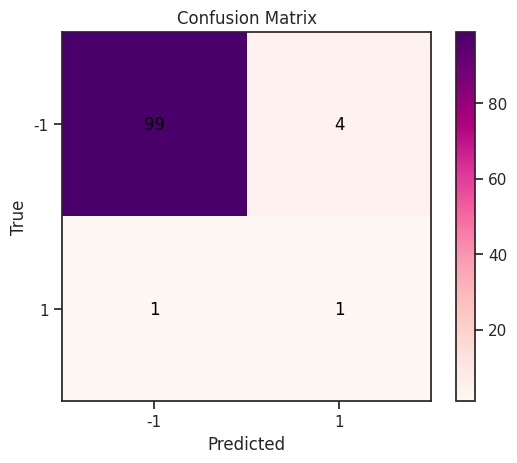

In [68]:
cm = confusion_matrix(y_val, predictions)
plot_confusion_matrix(cm, [-1,1])

### Calculate metrics

In [69]:
print("recall: ",recall_score(cm))

recall:  0.9523809523809523


In [70]:
print("percision: ",precision_score(cm))

percision:  0.7305825242718447


In [71]:
print("f1_score: ",f1_score(cm))

f1_score:  0.8268662866561363


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

***Answer:*** As seen in imbalanced datasets, accuracy may not be the best metric to evaluate a model's performance. Instead, F1 score, which is a balance between precision and recall, is a better choice. Precision measures the proportion of correctly predicted positive instances out of all predicted positive instances, while recall measures the proportion of correctly predicted positive instances out of all actual positive instances. By using F1 score, you can evaluate the model's performance by considering both precision and recall, which is particularly important in imbalanced datasets where the minority class is of interest.